In [1]:
import cv2
import numpy as np
from twoDDWT import *
import pylab 
pylab.rcParams['figure.figsize'] = (10, 10) 

In [2]:
def zero_diagonal(transform_input,scale):
    transform = np.copy(transform_input)
    (l,c) = np.shape(transform)
    for i in range(scale):
        transform[l//2:l,c//2:c] = np.zeros((l//2,c//2))
        l = l//2
        c = c//2
        
    return transform

def zero_vertical(transform_input,scale):
    transform = np.copy(transform_input)
    (l,c) = np.shape(transform)
    for i in range(scale):
        transform[:l//2,c//2:c] = np.zeros((l//2,c//2))
        l = l//2
        c = c//2
        
    return transform

def zero_horizontal(transform_input,scale):
    transform = np.copy(transform_input)
    (l,c) = np.shape(transform)
    for i in range(scale):
        transform[l//2:l,:c//2] = np.zeros((l//2,c//2))
        l = l//2
        c = c//2
        
    return transform

def zero_approximation(transform_input,scale):
    transform = np.copy(transform_input)
    (l,c) = np.shape(transform)
    for i in range(scale):
        l = l//2
        c = c//2
            
    transform[:l,:c] = np.zeros((l,c))
    return transform



In [3]:
image = cv2.imread('data/Fig0441(a)(characters_test_pattern).tif', cv2.IMREAD_GRAYSCALE)
image = image.astype('float64')

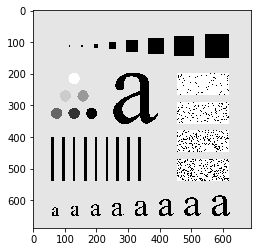

In [4]:
plot_transform(image,0)

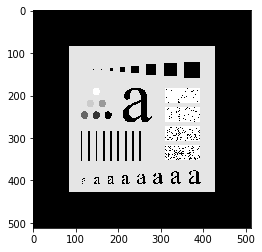

In [5]:
(l,c) = np.shape(image)
resized = np.copy(image)

resized = np.delete(resized,[2*i for i in range(l//2)],0)
resized = np.delete(resized,[2*i for i in range(c//2)],1)

(l,c) = np.shape(resized)
nb_pad_l = (512-l)//2
nb_pad_c = (512-c)//2

resized = cv2.copyMakeBorder(resized,nb_pad_l,nb_pad_l,nb_pad_c,nb_pad_c,cv2.BORDER_CONSTANT,value=0)
plot_transform(resized,0)

In [6]:
Transforms = []
for scale in range(1,10):
    Transforms.append(twoDDWT(resized,scale))

#  Zero the approximation coefficients

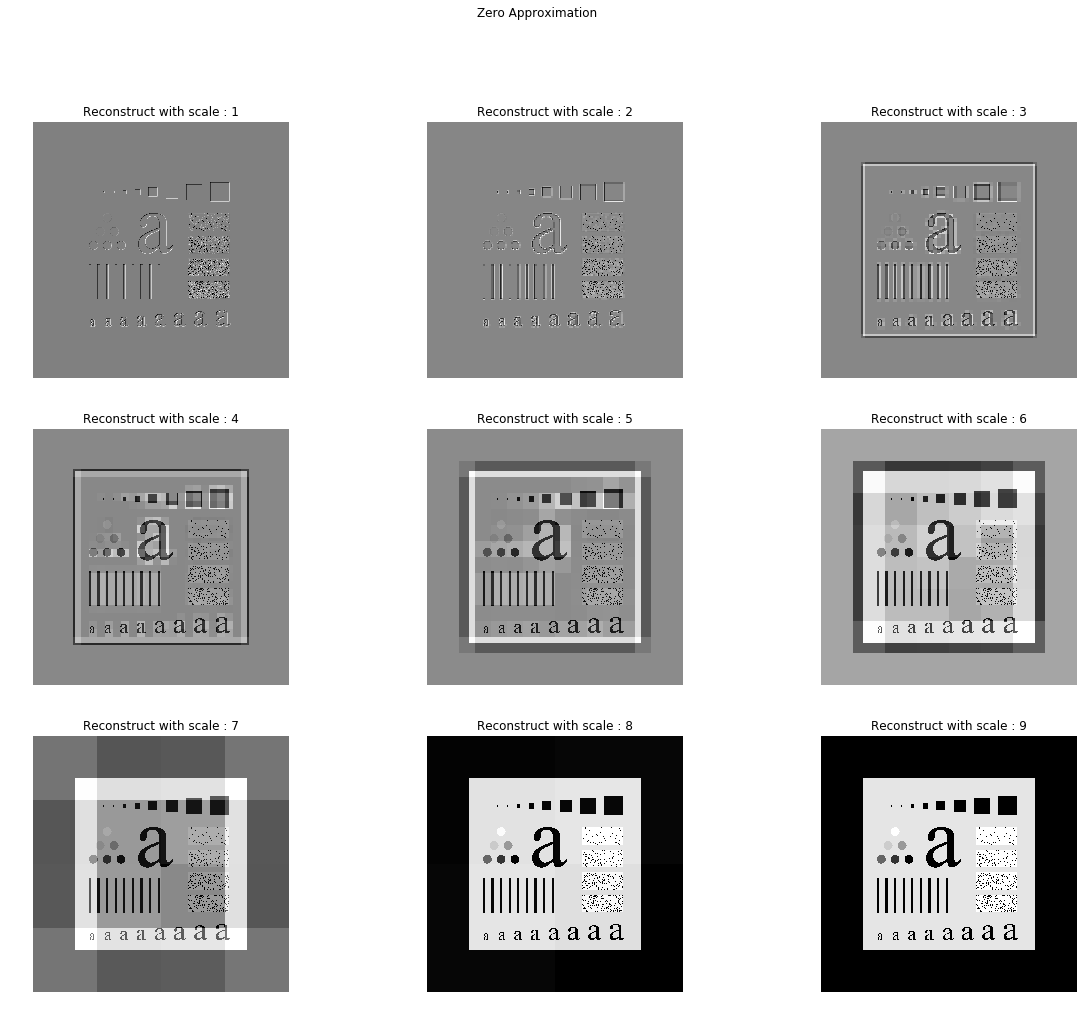

In [7]:
pylab.rcParams['figure.figsize'] = (20, 16) 
plt.figure()
plt.suptitle("Zero Approximation")
for i in range(len(Transforms)):
    show = inverse_twoDDWT(zero_approximation(Transforms[i],i+1),i+1)
    plt.subplot(3,3,i+1)
    plt.title("Reconstruct with scale : "+str(i+1))
    plt.axis('off')
    plt.imshow(show,cmap='gray')
plt.savefig("data/Zero_Approximation.png")


# Zero Horizontal

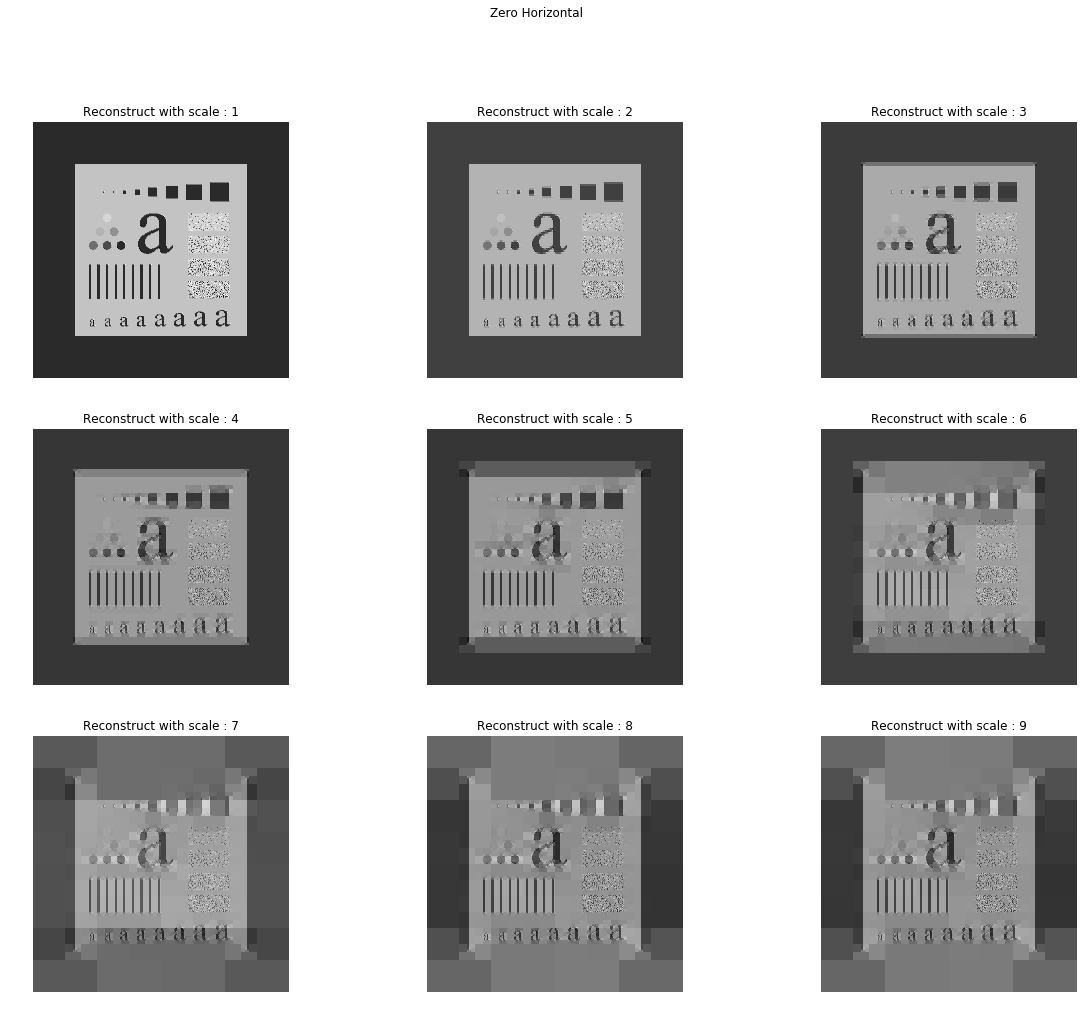

In [8]:
pylab.rcParams['figure.figsize'] = (20, 16) 
plt.figure()
plt.suptitle("Zero Horizontal")
for i in range(len(Transforms)):
    show = inverse_twoDDWT(zero_horizontal(Transforms[i],i+1),i+1)
    plt.subplot(3,3,i+1)
    plt.title("Reconstruct with scale : "+str(i+1))
    plt.axis('off')
    plt.imshow(show,cmap='gray')
plt.savefig("data/Zero_Horizontal.png")


# Zero Vertical

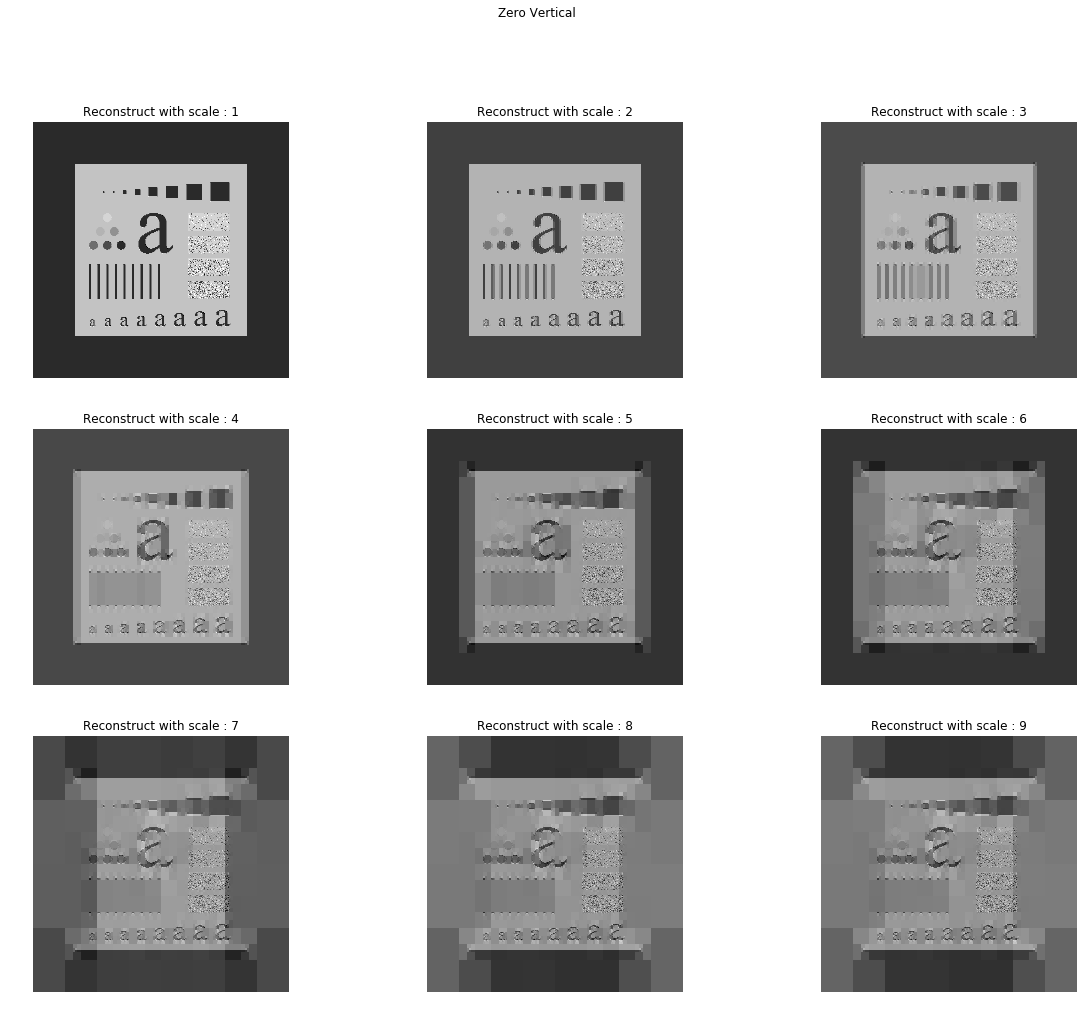

In [9]:
pylab.rcParams['figure.figsize'] = (20, 16) 
plt.figure()
plt.suptitle("Zero Vertical")
for i in range(len(Transforms)):
    show = inverse_twoDDWT(zero_vertical(Transforms[i],i+1),i+1)
    plt.subplot(3,3,i+1)
    plt.title("Reconstruct with scale : "+str(i+1))
    plt.axis('off')
    plt.imshow(show,cmap='gray')
plt.savefig("data/Zero_Vertical.png")


# Zero Vertical and Horizontal

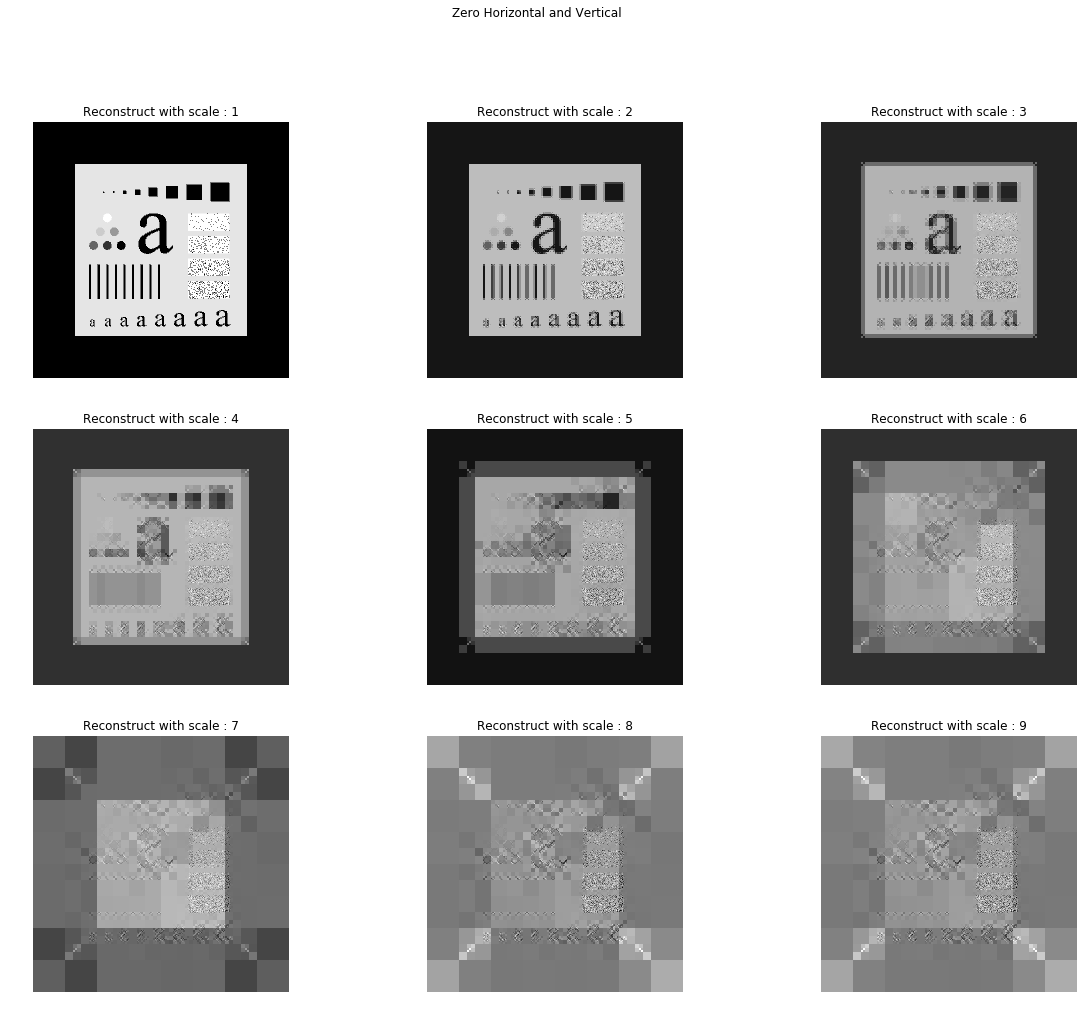

In [10]:
pylab.rcParams['figure.figsize'] = (20, 16) 
plt.figure()
plt.suptitle("Zero Horizontal and Vertical")
for i in range(len(Transforms)):
    show = inverse_twoDDWT(zero_vertical(zero_horizontal(Transforms[i],i+1),i+1),i+1)
    plt.subplot(3,3,i+1)
    plt.title("Reconstruct with scale : "+str(i+1))
    plt.axis('off')
    plt.imshow(show,cmap='gray')
plt.savefig("data/Zero_Vertical_Horizontal.png")


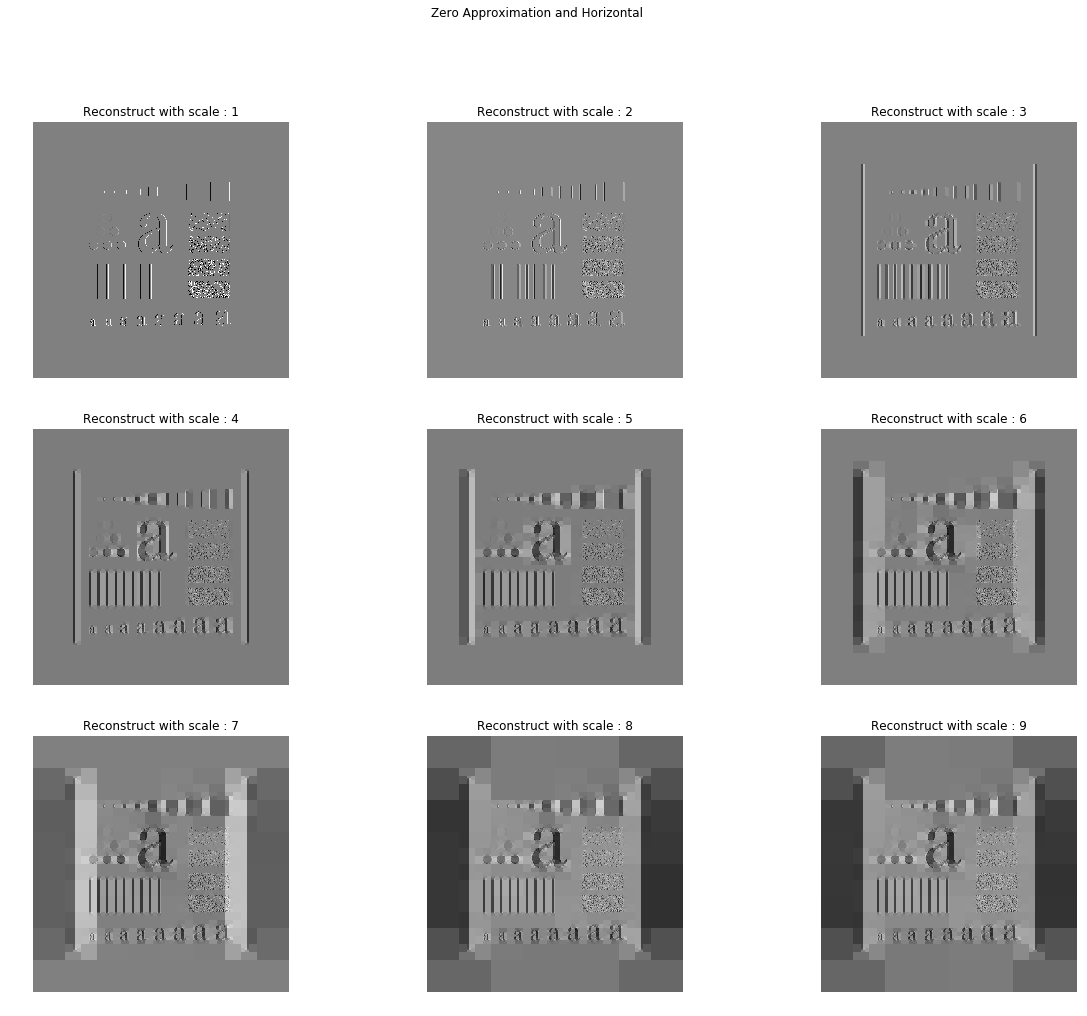

In [11]:
pylab.rcParams['figure.figsize'] = (20, 16) 
plt.figure()
plt.suptitle("Zero Approximation and Horizontal")
for i in range(len(Transforms)):
    show = inverse_twoDDWT(zero_approximation(zero_horizontal(Transforms[i],i+1),i+1),i+1)
    plt.subplot(3,3,i+1)
    plt.title("Reconstruct with scale : "+str(i+1))
    plt.axis('off')
    plt.imshow(show,cmap='gray')
plt.savefig("data/Zero_Approximation_Horizontal.png")


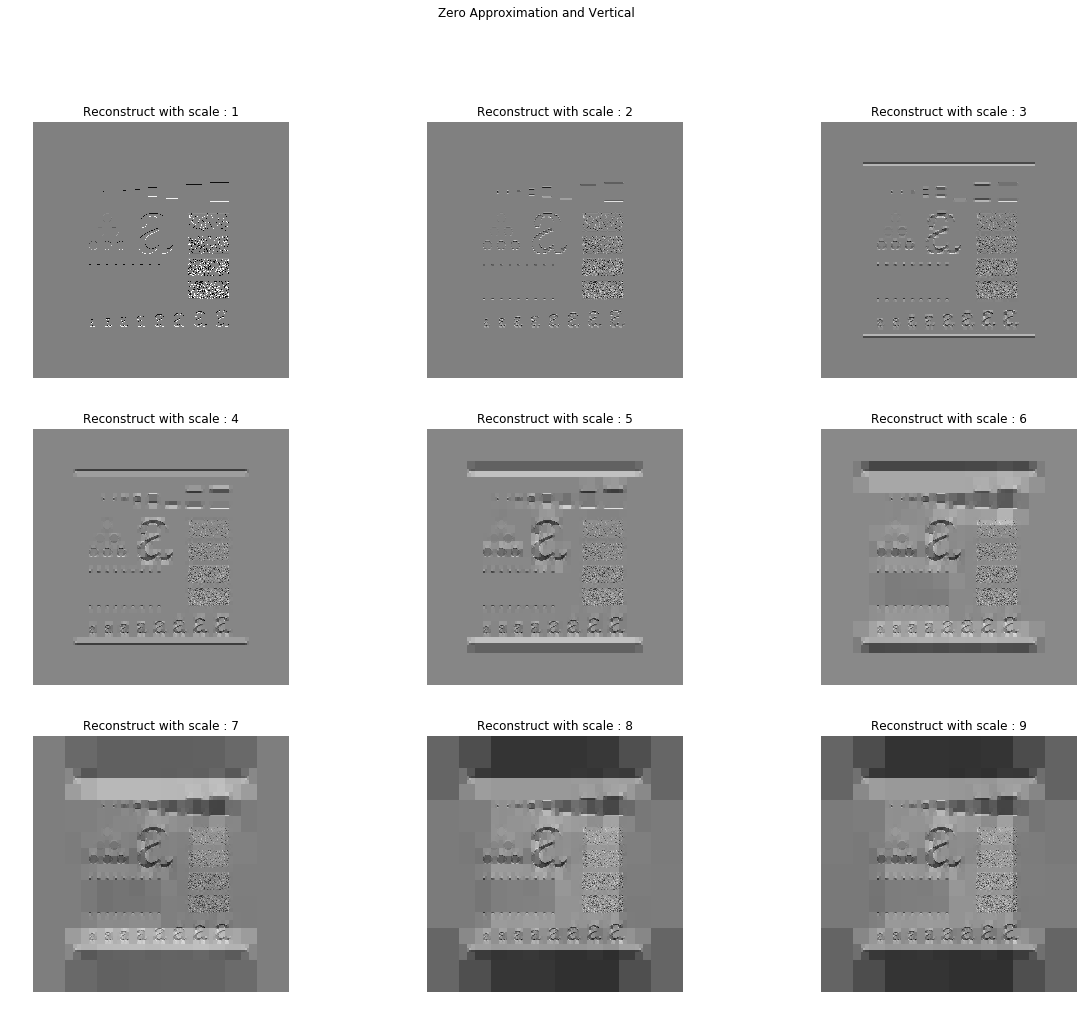

In [12]:
pylab.rcParams['figure.figsize'] = (20, 16) 
plt.figure()
plt.suptitle("Zero Approximation and Vertical")
for i in range(len(Transforms)):
    show = inverse_twoDDWT(zero_approximation(zero_vertical(Transforms[i],i+1),i+1),i+1)
    plt.subplot(3,3,i+1)
    plt.title("Reconstruct with scale : "+str(i+1))
    plt.axis('off')
    plt.imshow(show,cmap='gray')
plt.savefig("data/Zero_Approximation_Vertical.png")
